In [1]:
# !pip install geopandas matplotlib numpy

In [2]:
import geopandas as gpd

# Load the shapefile data
shapefile_path = 'data/fires/dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_crisis_information_poly_grading.shp'
fire_data = gpd.read_file(shapefile_path)

In [3]:
# Check the first few rows of the data
print(fire_data.head())

# Check the columns and data types
print(fire_data.info())

# Summary statistics of numerical columns
print(fire_data.describe())

   src_date ext_scale  nam  ext_date  txt src_info  act_id source_nam  \
0       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
1       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
2       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
3       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
4       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   

                       grading   interpret settl_type       subtype  \
0               Highly Damaged  Burnt Area       Null  EM005 - Fire   
1           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
2           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
3           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
4  Negligible to slight damage  Burnt Area       Null  EM005 - Fire   

                                            geometry  
0  POLYGON ((407580.917 4582431.821, 407580.917 4...  
1  POLYGON ((407616.779 

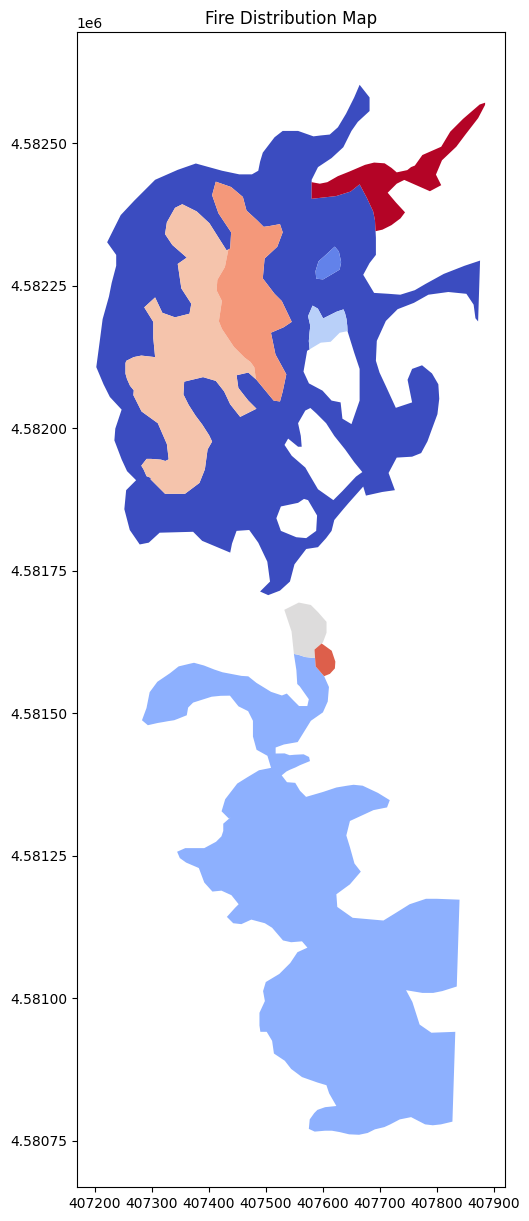

In [4]:
import matplotlib.pyplot as plt

# Plot the fire distribution
fire_data.plot(figsize=(15, 15), cmap='coolwarm', markersize=fire_data['grading'], legend=True)
plt.title('Fire Distribution Map')
plt.show()

In [5]:
set(fire_data['grading'])

{'Highly Damaged', 'Moderately Damaged', 'Negligible to slight damage'}

In [6]:
# Load other geospatial datasets
populated_places_path = 'data/fires//dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_populated_places_point.shp'
settlement_places_path = 'data/fires//dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_settlements_poly.shp'
transportation_lines_path = 'data/fires//dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_transportation_line.shp'
hydrography_lines_path = 'data/fires//dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_hydrography_line.shp'

populated_places = gpd.read_file(populated_places_path)
settlement_places = gpd.read_file(settlement_places_path)
transportation_lines = gpd.read_file(transportation_lines_path)
hydrography_lines = gpd.read_file(hydrography_lines_path)

# Explore the datasets
print(populated_places.head())
print(settlement_places.head())
print(transportation_lines.head())
print(hydrography_lines.head())

   src_date  src_info ext_scale   nam  ext_date      txt  \
0       NaN       NaN       10k  Brar       NaN  village   

                 act_id       source_nam        admin_lev  \
0  EMSR217-AOI-04-DAJTI  Open Street Map  populated place   

                  subtype                        geometry  
0  ZD040 - Named Location  POINT (405343.303 4583075.851)  
     src_date ext_scale  nam    ext_date  txt src_info                act_id  \
0         NaN       10k  NaN         NaN  yes      NaN  EMSR217-AOI-04-DAJTI   
1  2017-08-04       10k  NaN  2017-08-04  yes      NaN  EMSR217-AOI-04-DAJTI   
2  2017-08-04       10k  NaN  2017-08-04  yes      NaN  EMSR217-AOI-04-DAJTI   
3  2017-08-04       10k  NaN  2017-08-04  yes      NaN  EMSR217-AOI-04-DAJTI   
4  2017-08-04       10k  NaN  2017-08-04  yes      NaN  EMSR217-AOI-04-DAJTI   

   change_sta        functional   settl_type       source_nam admin_lev  \
0         NaN  Fully Functional         Null  Open Street Map   Unknown   
1    

/tmp/ipykernel_135961/2093015946.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


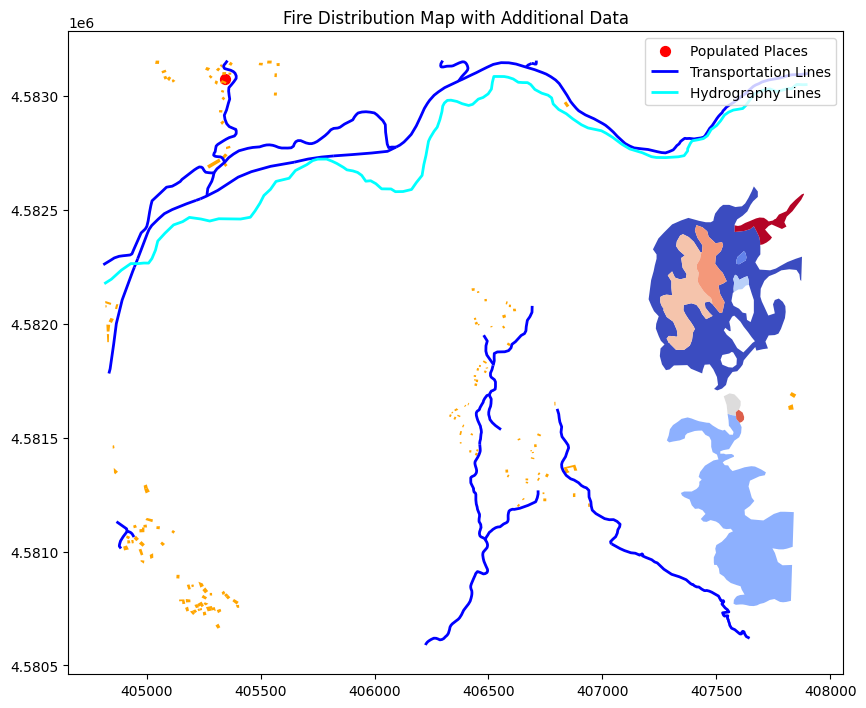

In [7]:
# Plot the fire distribution along with other datasets
fig, ax = plt.subplots(figsize=(10, 10))

fire_data.plot(ax=ax, cmap='coolwarm', markersize=fire_data['grading'], legend=True)
populated_places.plot(ax=ax, color='red', markersize=50, label='Populated Places')
settlement_places.plot(ax=ax, color='orange', markersize=50, label='Settlement Places')
transportation_lines.plot(ax=ax, color='blue', linewidth=2, label='Transportation Lines')
hydrography_lines.plot(ax=ax, color='cyan', linewidth=2, label='Hydrography Lines')

plt.title('Fire Distribution Map with Additional Data')
plt.legend()
plt.show()


In [8]:

# Perform spatial join to find fires near populated places
fires_near_populated_places = gpd.sjoin(fire_data, populated_places, op='intersects', how='inner')

# Perform spatial join to find fires near transportation lines
fires_near_transportation_lines = gpd.sjoin(fire_data, transportation_lines, op='intersects', how='inner')

# Perform spatial join to find fires near hydrography lines
fires_near_hydrography_lines = gpd.sjoin(fire_data, hydrography_lines, op='intersects', how='inner')




/home/delta/Desktop/open-labs/venv-emergency/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/home/delta/Desktop/open-labs/venv-emergency/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/home/delta/Desktop/open-labs/venv-emergency/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [9]:
# Load crisis information poly lines dataset
crisis_poly_lines_path = 'data/fires/dajti-fire/EMSR217_04DAJTI_02GRADING_v1_5000_crisis_information_poly_grading.shp'
crisis_poly_lines = gpd.read_file(crisis_poly_lines_path)

# Explore the dataset
print(crisis_poly_lines.head())

   src_date ext_scale  nam  ext_date  txt src_info  act_id source_nam  \
0       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
1       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
2       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
3       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   
4       NaN       10k  Unk       NaN  Unk      Unk     NaN       Null   

                       grading   interpret settl_type       subtype  \
0               Highly Damaged  Burnt Area       Null  EM005 - Fire   
1           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
2           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
3           Moderately Damaged  Burnt Area       Null  EM005 - Fire   
4  Negligible to slight damage  Burnt Area       Null  EM005 - Fire   

                                            geometry  
0  POLYGON ((407580.917 4582431.821, 407580.917 4...  
1  POLYGON ((407616.779 

/tmp/ipykernel_135961/312588627.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


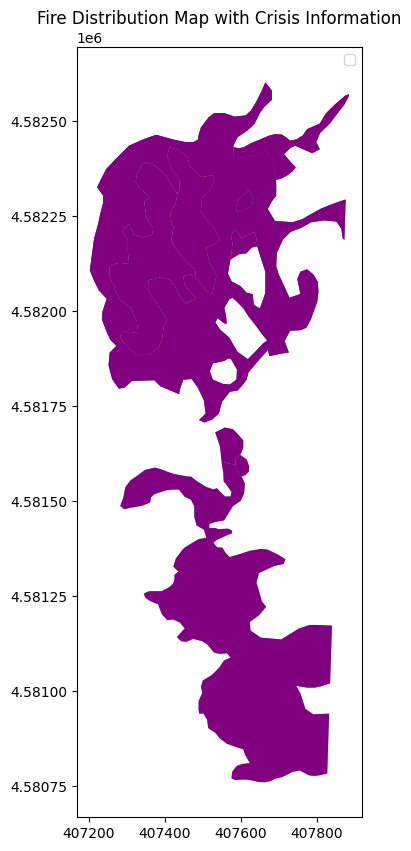

In [10]:
# Plot the fire distribution along with crisis information poly lines
fig, ax = plt.subplots(figsize=(10, 10))

fire_data.plot(ax=ax, cmap='coolwarm', markersize=fire_data['grading'], legend=True)
crisis_poly_lines.plot(ax=ax, color='purple', linewidth=2, label='Crisis Information Poly Lines')

plt.title('Fire Distribution Map with Crisis Information')
plt.legend()
plt.show()